In [3]:
import pandas as pd
import numpy as np

In [14]:
# Import Dartmouth Courses CSV file

df = pd.read_csv(r"~/Downloads/Dartmouth - Courses.csv")

# Clean the dataset

# Drop all rows with nonexistent values in their columns
df.dropna(inplace=True)

# Drop index coloumn
del df["Unnamed: 0"]

In [54]:
df

,Year,Term Number,Department,Course Number,Number of Sections,Enrollments,Median GPA Points,Average Section Size,GPA Category
1,2021.0,3.0,AAAS,31.90,1.0,17.0,4.000000,17.0,High
3,2021.0,3.0,AAAS,62.75,1.0,29.0,4.000000,29.0,High
4,2021.0,3.0,AAAS,65.65,1.0,16.0,3.333333,16.0,Medium
5,2021.0,3.0,AAAS,88.19,1.0,19.0,4.000000,19.0,High
7,2021.0,3.0,ANTH,18.00,1.0,16.0,4.000000,16.0,High
...,...,...,...,...,...,...,...,...,...
1540,2022.0,2.0,WGSS,43.06,1.0,13.0,3.666667,13.0,Medium
1545,2022.0,2.0,WGSS,66.11,1.0,10.0,4.000000,10.0,High
1555,2022.0,2.0,WRIT,7.34,1.0,16.0,3.833333,16.0,High
1556,2022.0,2.0,WRIT,7.35,1.0,16.0,4.000000,16.0,High


# Model 1: Predicting Course Enrollment

## Linear Regression

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting features and target variable
X = df[['Department', 'Course Number', 'Median GPA Points', 'Number of Sections', 'Average Section Size']]  # Features
y = df['Enrollments']  # Target variable

# Encoding categorical variables and splitting the data
categorical_features = ['Department']
numeric_features = ['Course Number', 'Median GPA Points', 'Number of Sections', 'Average Section Size']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression


# Model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'R-squared: {accuracy}')
print(f'R-squared: {cr}')

Mean Squared Error: 521.6749271825121
Mean Absolute Error: 11.364593281257974
R-squared: 0.7225654090933511


NameError: name 'accuracy' is not defined

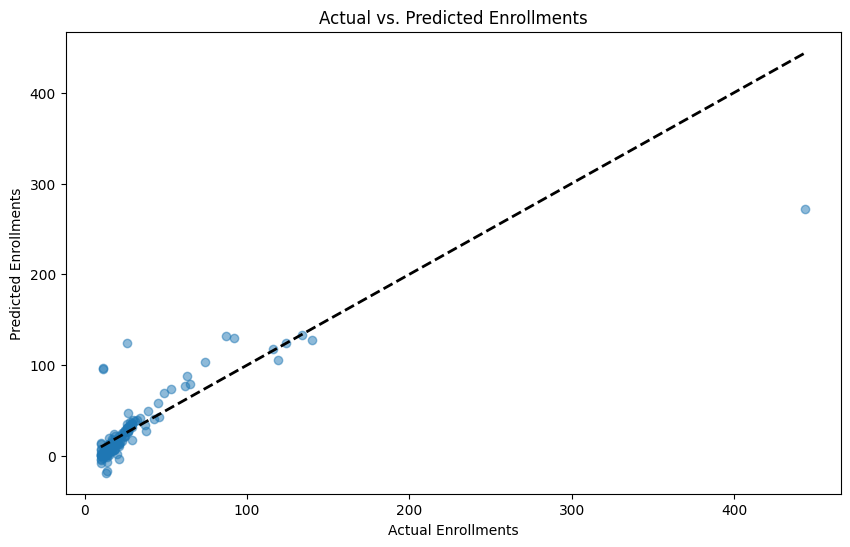

In [33]:
import matplotlib.pyplot as plt

# Plot Results
# Actual vs. Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Enrollments')
plt.ylabel('Predicted Enrollments')
plt.title('Actual vs. Predicted Enrollments')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Not bad, but definitely room for improvement. 

In [34]:
## 

In [35]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Model pipeline Random Forest Regressor
model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train Random Forest model
model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test)

In [39]:

# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - Mean Absolute Error: {mae_rf}')
print(f'Random Forest - R-squared: {r2_rf}')

Random Forest - Mean Squared Error: 702.7986507462689
Random Forest - Mean Absolute Error: 3.3123880597014925
Random Forest - R-squared: 0.6262410823295703


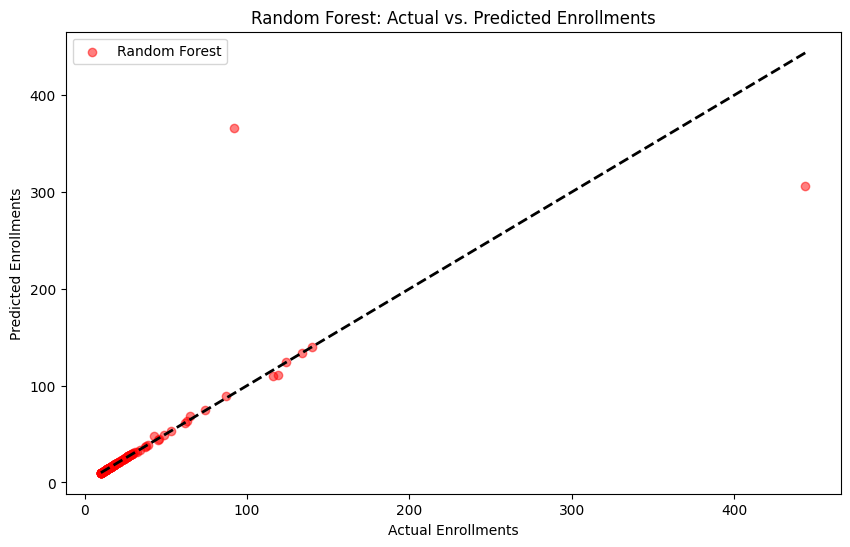

In [40]:
# Visualizing Actual vs. Predicted Enrollments for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='red', label='Random Forest')
plt.xlabel('Actual Enrollments')
plt.ylabel('Predicted Enrollments')
plt.title('Random Forest: Actual vs. Predicted Enrollments')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.legend()
plt.show()

While the R-squared metric is 0.6262410823295703, the graph shows that this model's predictions are very accurate and the relatively low metric score is due to the two outliers in the dataset.

# Model 2: Classifying Courses Based on Median GPA Points

In [48]:
# Categorize median GPA points into 'High', 'Medium', 'Low'
conditions = [
    (df['Median GPA Points'] > 3.67),
    (df['Median GPA Points'] <= 3.67) & (df['Median GPA Points'] > 3.33),
    (df['Median GPA Points'] <= 3.33)
]

# Define class labels
labels = ['High', 'Medium', 'Low']

# Create a new column in the dataframe for the GPA categories
df['GPA Category'] = np.select(conditions, labels)

# Preparing features and target variable for classification
X = df[['Department', 'Course Number', 'Number of Sections', 'Enrollments', 'Average Section Size']]  # Features for classification
y = df['GPA Category']  # Target variable

# Encoding categorical variables and splitting the data
categorical_features = ['Department']
numeric_features = ['Course Number', 'Number of Sections', 'Enrollments', 'Average Section Size']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Splitting dataset into training and testing sets for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model pipeline with Random Forest Classifier
model_rf_class = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Training the Random Forest Classifier
model_rf_class.fit(X_train, y_train)

# Predicting on the test set
y_pred_class = model_rf_class.predict(X_test)


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluating the Random Forest Classifier
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')
f1 = f1_score(y_test, y_pred_class, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_class))

Accuracy: 0.6343283582089553
Precision: 0.6245901345612872
Recall: 0.6343283582089553
F1 Score: 0.6224240610374459

Classification Report:
               precision    recall  f1-score   support

        High       0.64      0.77      0.70        70
         Low       0.00      0.00      0.00         2
      Medium       0.63      0.50      0.56        62

    accuracy                           0.63       134
   macro avg       0.42      0.42      0.42       134
weighted avg       0.62      0.63      0.62       134



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   0.6s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   0.4s
[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=10, classifier__min_

In [51]:
# Tune Hyperparamters 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(model_rf_class, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 8

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['Course '
                                                                          'Number',
                                                                          'Number '
                                                                          'of '
                                                                          'Sections',
                                                                          'Enrollments',
                                                                          'Average '
                                                                          'Section '
                                                                          'Size']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Department'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [53]:
# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate on test set
y_pred_best = grid_search.predict(X_test)
print('\nClassification Report (Best Model):\n', classification_report(y_test, y_pred_best))

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best score: nan

Classification Report (Best Model):
               precision    recall  f1-score   support

        High       0.64      0.77      0.70        70
         Low       0.00      0.00      0.00         2
      Medium       0.63      0.50      0.56        62

    accuracy                           0.63       134
   macro avg       0.42      0.42      0.42       134
weighted avg       0.62      0.63      0.62       134



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   0.5s
[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   0.5s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   0.4s
[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_